In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# DATASET Exploration

## Dataset Reading

In [2]:
df_energy = pd.read_csv('dataset/energy_dataset.csv')
df_weather = pd.read_csv('dataset/weather_features.csv')

## Weather dataset

In [3]:
df_weather.head(10)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 05:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
6,2015-01-01 06:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
7,2015-01-01 07:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
8,2015-01-01 08:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d
9,2015-01-01 09:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d


### Description of the columns --> DA SISTEMARE
- dt_iso = data e ora compresa di fuso orario
- city_name = nome città
- temp = temperatura media misurata in Kelvin
- temp_min = temperatura minima misurata in Kelvin
- temp_max = temperatura massima misurata in Kelvin
- pressure = pressione misurata in Pascal
- humidity = umidità
- wind_speed = velocità del vento
- wind_deg = direzione del vento
- rain_1h = mm di acqua piovuta nell'ultima ora
- rain_3h = mm di acqua piovuta nelle ultime 3 ore
- snow_3h = mm di neve caduti nelle ultime 3 ore
- clouds_all = nuvole in cielo
- weather_id = codice che indica il tempo
- weather_main = nome associato al codice
- weather_description = descrizione del tempo
- weather_icon =

In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

We have to parse 'dt_iso' correctly and actually rename it as 'time' so that it matches with the index of df_energy.

In [5]:
df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)
df_weather.rename(columns={'dt_iso': 'time'}, inplace=True)
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_2069/4245212963.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)
/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_2069/4245212963.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)


In [6]:
df_energy_weather = pd.merge(df_energy, df_weather, on='time')

In [7]:
df_weather.describe().round(4)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.0000,178396.0000,178396.0000,1.783960e+05,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000
mean,289.6186,288.3304,291.0913,1.069261e+03,68.4235,2.4706,166.5912,0.0755,0.0004,0.0048,25.0733,759.8319
std,8.0262,7.9555,8.6125,5.969632e+03,21.9029,2.0959,116.6119,0.3988,0.0073,0.2226,30.7741,108.7332
min,262.2400,262.2400,262.2400,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,200.0000
25%,283.6700,282.4836,284.6500,1.013000e+03,53.0000,1.0000,55.0000,0.0000,0.0000,0.0000,0.0000,800.0000
50%,289.1500,288.1500,290.1500,1.018000e+03,72.0000,2.0000,177.0000,0.0000,0.0000,0.0000,20.0000,800.0000
75%,295.1500,293.7301,297.1500,1.022000e+03,87.0000,4.0000,270.0000,0.0000,0.0000,0.0000,40.0000,801.0000
max,315.6000,315.1500,321.1500,1.008371e+06,100.0000,133.0000,360.0000,12.0000,2.3150,21.5000,100.0000,804.0000


We should note that the temperatures are in Kelvin. So to better understand the date we decided to change in Celsius.

In [8]:
df_weather["temp_Celsius"] = df_weather.temp - 273.15
df_weather["temp_min_Celsius"] = df_weather.temp_min - 273.15
df_weather["temp_max_Celsius"] = df_weather.temp_max - 273.15
df_weather.drop(columns = ['temp', 'temp_min', 'temp_max'], inplace = True)

In [9]:
new_column_order = ['city_name', 'time', 'temp_Celsius', 'temp_min_Celsius', 'temp_max_Celsius',
                    'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h','clouds_all',
                    'weather_id', 'weather_main', 'weather_description','weather_icon']
df_weather = df_weather.reindex(columns = new_column_order)
df_weather

,city_name,time,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,Valencia,2014-12-31 23:00:00+00:00,-2.675,-2.675,-2.675,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,Valencia,2015-01-01 00:00:00+00:00,-2.675,-2.675,-2.675,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,Valencia,2015-01-01 01:00:00+00:00,-3.464,-3.464,-3.464,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,Valencia,2015-01-01 02:00:00+00:00,-3.464,-3.464,-3.464,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,Valencia,2015-01-01 03:00:00+00:00,-3.464,-3.464,-3.464,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,Seville,2018-12-31 18:00:00+00:00,14.610,14.000,15.000,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,Seville,2018-12-31 19:00:00+00:00,12.610,12.000,13.000,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,Seville,2018-12-31 20:00:00+00:00,12.000,12.000,12.000,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,Seville,2018-12-31 21:00:00+00:00,11.000,11.000,11.000,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [10]:
df_weather.describe().round(4)

,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.0000,178396.0000,178396.0000,1.783960e+05,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000
mean,16.4686,15.1804,17.9413,1.069261e+03,68.4235,2.4706,166.5912,0.0755,0.0004,0.0048,25.0733,759.8319
std,8.0262,7.9555,8.6125,5.969632e+03,21.9029,2.0959,116.6119,0.3988,0.0073,0.2226,30.7741,108.7332
min,-10.9100,-10.9100,-10.9100,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,200.0000
25%,10.5200,9.3336,11.5000,1.013000e+03,53.0000,1.0000,55.0000,0.0000,0.0000,0.0000,0.0000,800.0000
50%,16.0000,15.0000,17.0000,1.018000e+03,72.0000,2.0000,177.0000,0.0000,0.0000,0.0000,20.0000,800.0000
75%,22.0000,20.5801,24.0000,1.022000e+03,87.0000,4.0000,270.0000,0.0000,0.0000,0.0000,40.0000,801.0000
max,42.4500,42.0000,48.0000,1.008371e+06,100.0000,133.0000,360.0000,12.0000,2.3150,21.5000,100.0000,804.0000


Here, we can see that all columns of df_weather have the same number of rows; we still have to check what is the case for each city individually, though. 
 The most important thing to notice is that there are some **problems** and **outliers**.

There are some problems with:
- The 'pressure' column
- The 'wind_speed' column
- The '3h_rain' column is supposed to provide information about the precipitation in the last 3 hours, for this reason it would be logical to assume that its mean would be higher of '1h_rain' column. But this is not the case, so it's a good idea to further examine those columns.

Visualize the average values for each column, grouped by each city (note that the 'weather_id' average has no meaning whatsoever)

In [11]:
mean_weather_without_time = df_weather.drop(columns = ['time', 'weather_description', 'weather_main', 'weather_icon'])
mean_weather_by_city = mean_weather_without_time.groupby('city_name').mean()
mean_weather_by_city

,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
city_name,,,,,,,,,,,,
Barcelona,16.698248,15.444704,17.871987,1284.010486,73.994221,2.786588,187.188043,0.117079,0.000327,0.000000,23.229648,760.917465
Bilbao,13.228489,11.766661,14.886687,1017.567439,79.089455,1.957470,159.883536,0.123493,0.001034,0.023455,43.960697,723.943228
Madrid,14.911071,13.674877,16.005600,1011.838448,59.776932,2.441696,173.293159,0.055083,0.000129,0.000029,22.397028,762.260264
Seville,19.955431,18.034103,22.812431,1018.504711,64.140732,2.483787,151.757179,0.045392,0.000180,0.000000,14.748770,771.409849
Valencia,17.630780,17.072277,18.205025,1015.973794,65.145113,2.692815,160.753820,0.035924,0.000226,0.000154,20.820999,781.228283


Since, df_weather contains information about 5 different cities, it is very useful to display the number of observations for each one and compare it with the size of df_energy.

In [12]:
# Find duplicates in df_weather

print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

city_unique = df_weather.city_name.unique()
grouped_weather = df_weather.groupby('city_name')

for city in city_unique:
    print('There are', format(grouped_weather.get_group('{}'.format(city)).shape[0]),'observations in df_weather about city:', city)

There are 35064 observations in df_energy.
There are 35145 observations in df_weather about city: Valencia
There are 36267 observations in df_weather about city: Madrid
There are 35951 observations in df_weather about city: Bilbao
There are 35476 observations in df_weather about city:  Barcelona
There are 35557 observations in df_weather about city: Seville


In this way the two dataset cannot be mearged yet. There are many duplicates for every city in df_weather and we should drop them and see if their number of rows match. We do this by resetting the index, keeping only the first rows which have the same 'time' and 'city_name' values and then setting again 'time' as the index. For further research on the dataset, let us also create a second dataframe, df_weather_2 in which we do the same procedure, but keep only the last rows which have the same 'time' and 'city_name'.

In [13]:
df_weather2 = df_weather.drop_duplicates(subset=['time', 'city_name'], keep='last')

df_weather = df_weather.drop_duplicates(subset=['time', 'city_name'], keep='first')

In [14]:
# Display the number of rows for each city again

print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

for city in city_unique:
    print('There are', format(grouped_weather.get_group('{}'.format(city)).shape[0]),'observations in df_weather about city:', city)

There are 35064 observations in df_energy.
There are 35145 observations in df_weather about city: Valencia
There are 36267 observations in df_weather about city: Madrid
There are 35951 observations in df_weather about city: Bilbao
There are 35476 observations in df_weather about city:  Barcelona
There are 35557 observations in df_weather about city: Seville


The column 'weather_icon' is irrelevant for our analysis, so we will drop it. Furthermore, the columns 'weather_main' and 'weather_description' contain approximately the same information as the column 'weather_id'; the information concerns a qualitative description of the weather at the given hour. So, we will work with only one of them. However, in order to make a choice, we have to check the unique values as well as the consistency of each column.

In [15]:
weather_description_unique = df_weather.weather_description.unique()
weather_description_unique

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity shower rain',
       'light intensity drizzle', 'thunderstorm with rain', 'fog',
       'smoke', 'drizzle', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light snow', 'rain and snow',
       'light rain and snow', 'snow', 'sleet', 'rain and drizzle',
       'light intensity drizzle rain', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain', 'heavy snow',
       'sand dust whirls', 'proximity drizzle', 'dust',
       'light thunderstorm', 'squalls'], dtype=object)

In [16]:
weather_main_unique = df_weather.weather_main.unique()
weather_main_unique

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [17]:
weather_id_unique = df_weather.weather_id.unique()
weather_id_unique

array([800, 801, 802, 803, 804, 500, 501, 502, 701, 522, 521, 503, 202,
       200, 211, 520, 300, 201, 741, 711, 301, 302, 721, 600, 616, 615,
       601, 611, 311, 310, 620, 531, 602, 731, 761, 210, 771])

We can see that in terms of qualitative description, the 'weather_main' column seems to contain the less detailed -or "poorest"- information, while 'weather_id' and 'weather_description' have more complex information and approximately the same number of unique values.

Nevertheless, it is also useful to check the consistency of the information in each column. Since our dataset contained duplicate rows and we utilized two different methods for cleaning it, a very good way to check the consistency of the data in these three columns would be to compare the two cleaned dataframes, df_weather and df_weather_2. In order to do this, we employ the R² ("R-squared" or "coefficient of determination") metric, after encoding 'weather_description' and 'weather_main' from strings to numerical labels.

In [18]:
# Define a function which will calculate R-squared score for the same column in our two datasets

def encode_and_display_r2_score(dataset1, dataset2, column, categorical = False):
    datasets = [dataset1, dataset2]
    if categorical:
        for df in datasets:
            label_encoder = LabelEncoder()
            df.loc[:, column] = label_encoder.fit_transform(df[column])
    r2 = r2_score(dataset1[column], dataset2[column])
    print("R-Squared score of", column, "is", r2)

In [19]:
encode_and_display_r2_score(df_weather, df_weather2, 'weather_description', categorical = True)
encode_and_display_r2_score(df_weather, df_weather2, 'weather_main', categorical = True)
encode_and_display_r2_score(df_weather, df_weather2, 'weather_id')

R-Squared score of weather_description is 0.972978840026219
R-Squared score of weather_main is 0.9627152451498913
R-Squared score of weather_id is 0.9205784928822044


It seems that we have found incosistencies in our dataset. In particular, all three of the columns which contain qualitative info for the condition of the weather seem to contain a large part of the duplicates that we found earlier in df_weather. From the above R-squared scores, it seems that keeping and one-hot encoding 'weather_description' or 'weather_main' is the best idea to get the most out of information in the dataset. Note that the R² values of these two are not comparable because we have first encoded them; in order to actually calculate the similarity between two strings, we need to employ a different metric such as the Levenshtein distance, i.e. the number of edits required to transform string A to string B. In this case, even this metric would not be enough in order to make 'weather_main' and 'weather_description' comparable as the former contains only single words while the latter large phrases which describe the weather.

In [20]:
# Drop columns with qualitative weather information
df_weather = df_weather.drop(['weather_main', 'weather_id', 
                              'weather_description', 'weather_icon'], axis=1)

We have to emphasize that the method we employed above in order to check the consistency of our dataset is not 100% accurate. This is because it compares two dataframes from which we have cleaned the duplicates in only two ways exclusively; keeping the first rows and keeping the last rows of the duplicates. Nevertheless, it gives good results and can be used to check the values of the other columns as well. We should not that since we removed the duplicates based on all the columns except 'time' and 'city_name', there is no point in checking the latter.

### Pressure outlier

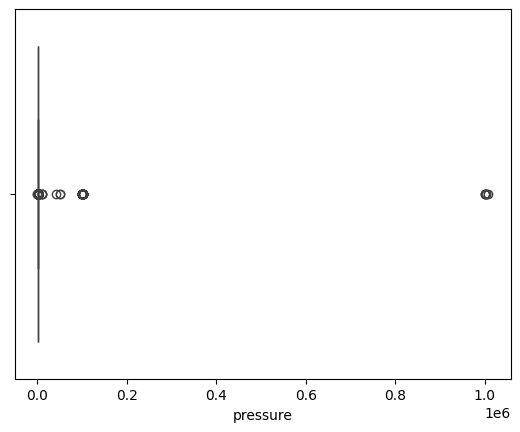

In [21]:
# Check for outliers in 'pressure' column

sns.boxplot(x=df_weather['pressure'])
plt.show()

In [22]:
pressure_mask = df_weather.pressure > 800000
df_weather[pressure_mask]

,city_name,time,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
108589,Barcelona,2015-02-21 01:00:00+00:00,10.10,10.10,10.10,1008371,0,3,337,12.0,0.0,0.0,12
108596,Barcelona,2015-02-21 08:00:00+00:00,10.90,10.90,10.90,1001781,0,9,292,0.0,0.0,0.0,92
108597,Barcelona,2015-02-21 09:00:00+00:00,10.90,10.90,10.90,1001501,0,2,337,0.0,0.0,0.0,92
108598,Barcelona,2015-02-21 10:00:00+00:00,1.50,1.50,1.50,1000951,0,2,337,0.3,0.0,0.0,92
108618,Barcelona,2015-02-22 06:00:00+00:00,6.72,6.72,6.72,1002241,0,0,0,0.0,0.0,0.0,0
108619,Barcelona,2015-02-22 07:00:00+00:00,8.60,8.60,8.60,1002881,0,1,22,0.0,0.0,0.0,0


In [23]:
df_weather.head()

,city_name,time,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,Valencia,2014-12-31 23:00:00+00:00,-2.675,-2.675,-2.675,1001,77,1,62,0.0,0.0,0.0,0
1,Valencia,2015-01-01 00:00:00+00:00,-2.675,-2.675,-2.675,1001,77,1,62,0.0,0.0,0.0,0
2,Valencia,2015-01-01 01:00:00+00:00,-3.464,-3.464,-3.464,1002,78,0,23,0.0,0.0,0.0,0
3,Valencia,2015-01-01 02:00:00+00:00,-3.464,-3.464,-3.464,1002,78,0,23,0.0,0.0,0.0,0
4,Valencia,2015-01-01 03:00:00+00:00,-3.464,-3.464,-3.464,1002,78,0,23,0.0,0.0,0.0,0


In [24]:
# Function for the plot of the outlier

def visualize_outlier(df, city, var, date1 = '2014-12-31 23:00:00+00:00', date2 = '2018-12-31 22:00:00+00:00', date3 = False, date4 = False):
    df_weather_city = df[df['city_name'] == city]
    if date3 == False:
        time_mask = (df_weather_city['time'] > date1) & (df_weather_city['time'] < date2)
    
        plot_mask = df_weather_city[time_mask]
        
        plt.figure(figsize=(15, 7))
        plt.plot(plot_mask['time'], plot_mask[var], label = city)
        plt.xlabel('Date')
        plt.ylabel(var)

        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        time_mask1 = (df_weather_city['time'] > date1) & (df_weather_city['time'] < date2)
        time_mask2 = (df_weather_city['time'] > date3) & (df_weather_city['time'] < date4)
        
        plot_mask1 = df_weather_city[time_mask1]
        plot_mask2 = df_weather_city[time_mask2]
    
        
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))
        axs[0].plot(plot_mask1['time'], plot_mask1[var], label = city)
        axs[0].set_xlabel('Date')
        axs[0].set_ylabel(var)
        axs[0].tick_params(axis='x', rotation=90)

        axs[1].plot(plot_mask2['time'], plot_mask2[var], label = city)
        axs[1].set_xlabel('Date')
        axs[1].set_ylabel(var)
        axs[1].tick_params(axis='x', rotation=90)

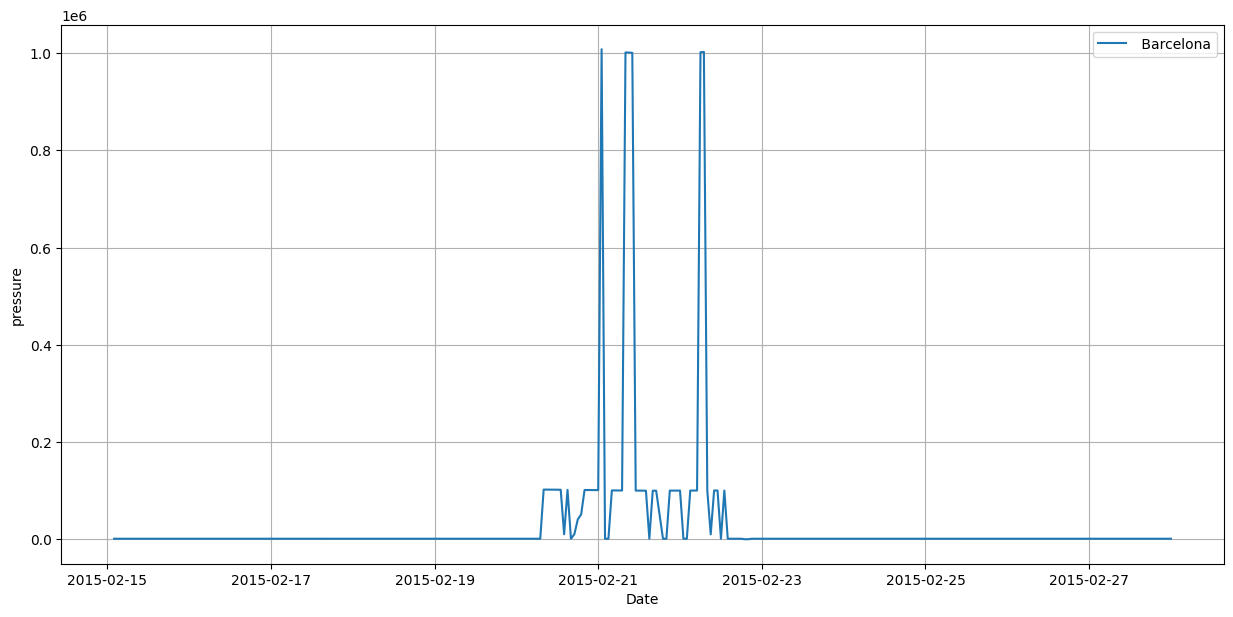

In [25]:
city = ' Barcelona'
var = 'pressure'
date1 = '2015-02-15 01:00:00+00:00'
date2 = '2015-02-28 01:00:00+00:00'

visualize_outlier(df_weather, city, var, date1, date2)

In [26]:
df_weather.loc[df_weather.pressure > 1051, 'pressure'] = np.nan
df_weather.loc[df_weather.pressure < 931, 'pressure'] = np.nan

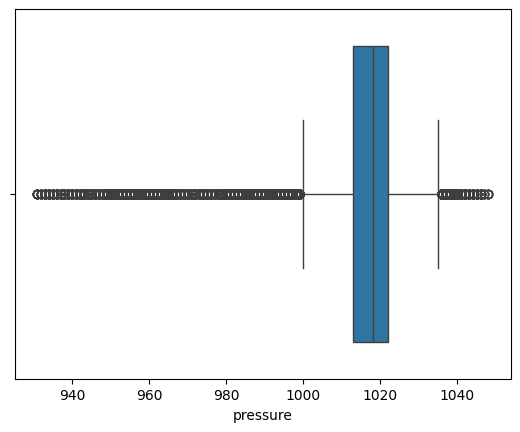

In [27]:
# Check for outliers in 'pressure' column

sns.boxplot(x=df_weather['pressure'])
plt.show()

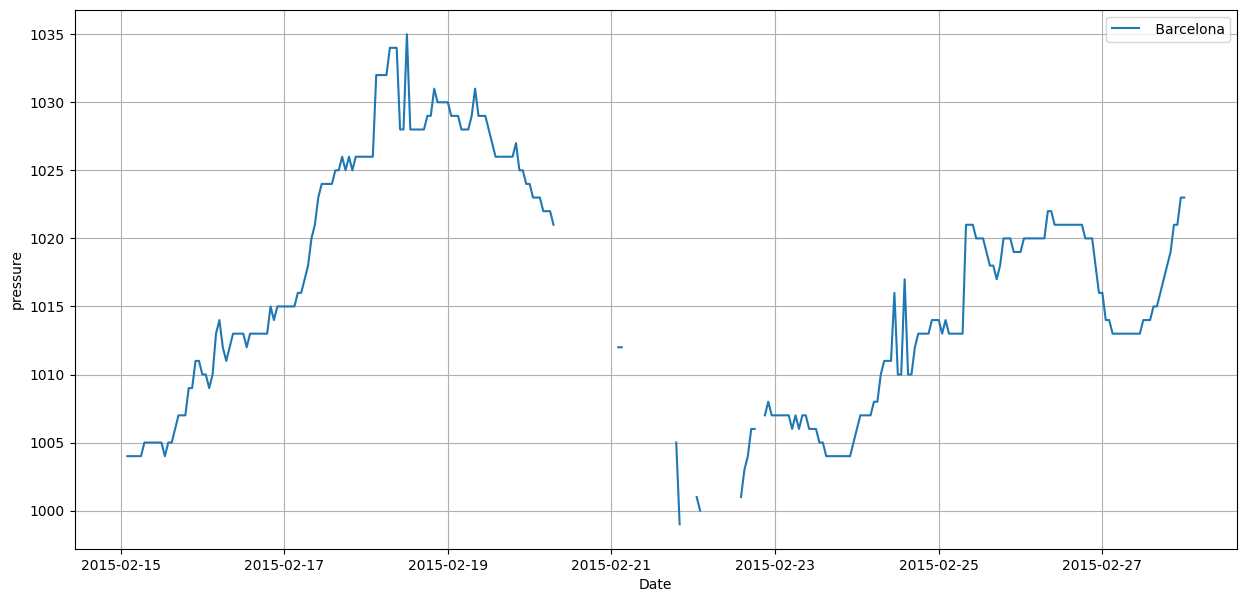

In [28]:
city = ' Barcelona'
var = 'pressure'
date1 = '2015-02-15 01:00:00+00:00'
date2 = '2015-02-28 01:00:00+00:00'

visualize_outlier(df_weather, city, var, date1, date2)

We try to fill the NaN value with the avagere value of the pressure in that city

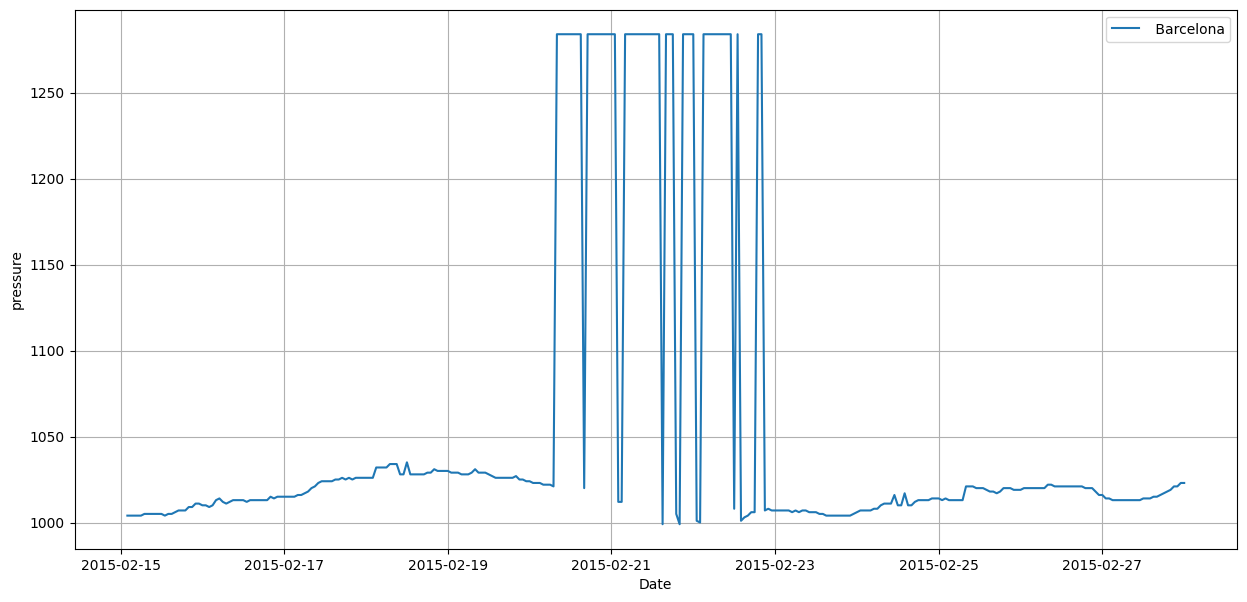

In [29]:
barcelona_pressure = mean_weather_by_city.loc[' Barcelona', 'pressure']
df_weather_pressure_mean = df_weather.fillna(barcelona_pressure)

city = ' Barcelona'
var = 'pressure'
date1 = '2015-02-15 01:00:00+00:00'
date2 = '2015-02-28 01:00:00+00:00'

visualize_outlier(df_weather_pressure_mean, city, var, date1, date2)

We try to fill the NaN value with the interpolation method

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_2069/595364051.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_weather3.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)


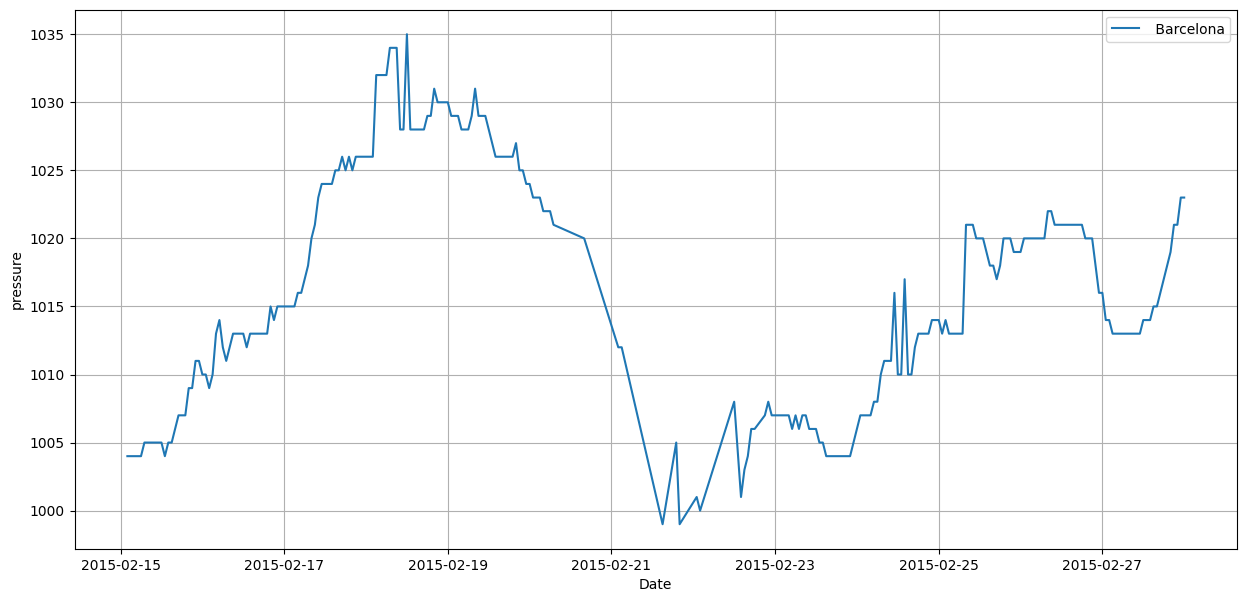

In [30]:
df_weather3 = df_weather.copy()
df_weather3.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

city = ' Barcelona'
var = 'pressure'
date1 = '2015-02-15 01:00:00+00:00'
date2 = '2015-02-28 01:00:00+00:00'

visualize_outlier(df_weather3, city, var, date1, date2)

### Wind_speed outliers

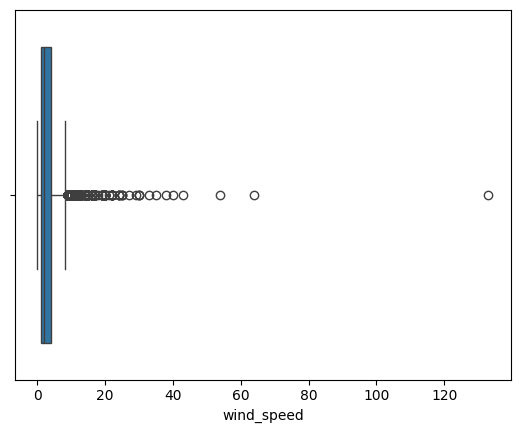

In [31]:
# Check for outliers in 'wind_speed' column

sns.boxplot(x=df_weather['wind_speed'])
plt.show()

La velocità del vento di un tifone è di solito intorno ai 40 metri al secondo, che corrisponde a circa 190 chilogrammi per metro quadrato. L'elenco di conversione del livello del vento, della velocità del vento e della pressione del vento è mostrato nella tabella.

In [32]:
wind_mask = df_weather.wind_speed > 50
df_weather[wind_mask]

,city_name,time,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
708,Valencia,2015-01-30 10:00:00+00:00,16.6,16.6,16.6,997.0,62,64,314,0.0,0.0,0.0,0
712,Valencia,2015-01-30 14:00:00+00:00,17.8,17.8,17.8,993.0,58,54,262,0.0,0.0,0.0,0
20725,Valencia,2017-05-11 10:00:00+00:00,20.0,20.0,20.0,1002.0,52,133,20,0.0,0.0,0.0,20


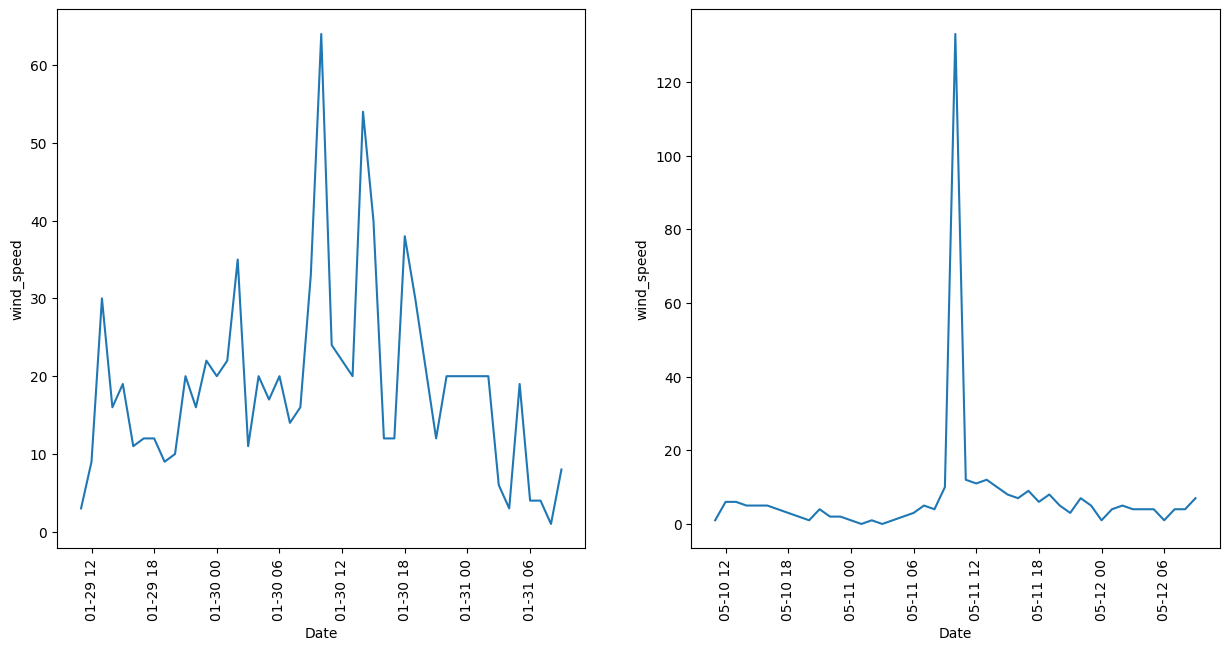

In [33]:
# Plot of the strange value in the wind_speed

city = 'Valencia'
var = 'wind_speed'
date1 = '2015-01-29 10:00:00+00:00'
date2 = '2015-01-31 10:00:00+00:00'
date3 = '2017-05-10 10:00:00+00:00'
date4 = '2017-05-12 10:00:00+00:00'

visualize_outlier(df_weather, city, var, date1, date2, date3, date4)

In [34]:
df_weather.loc[df_weather.wind_speed > 50, 'wind_speed'] = np.nan

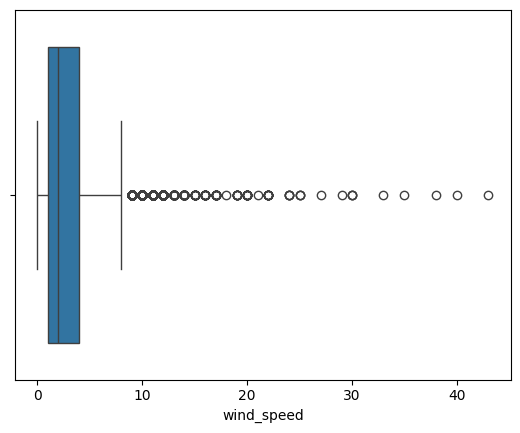

In [35]:
# Check for outliers in 'wind_speed' column

sns.boxplot(x=df_weather['wind_speed'])
plt.show()

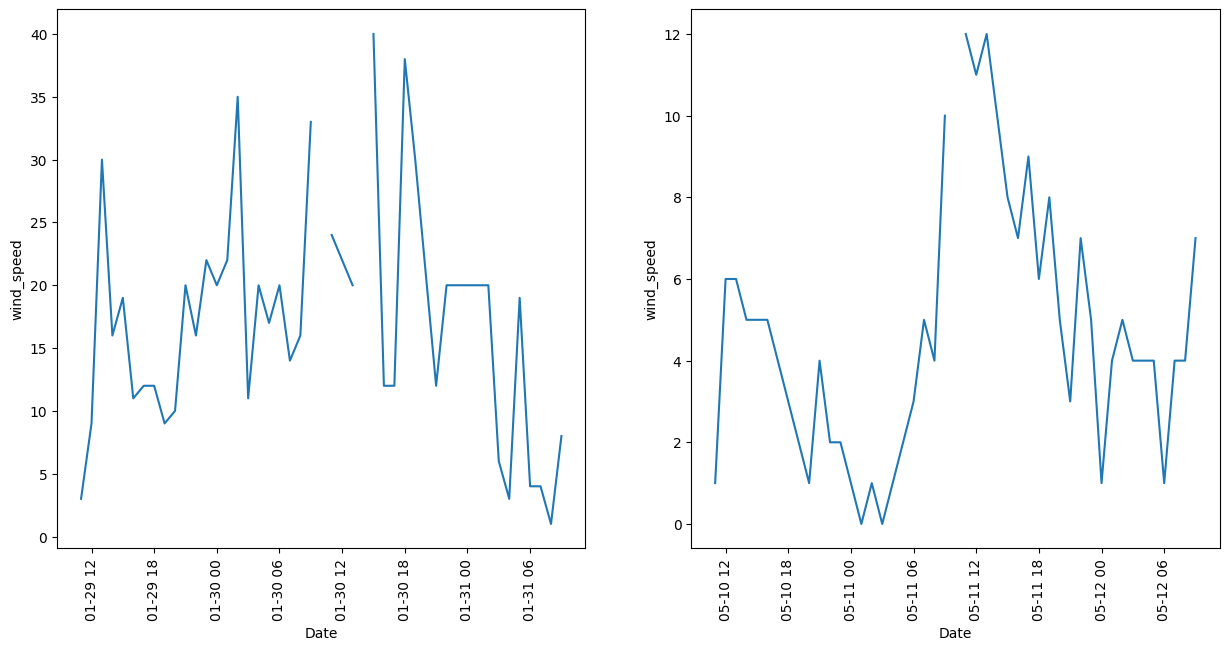

In [36]:
city = 'Valencia'
var = 'wind_speed'
date1 = '2015-01-29 10:00:00+00:00'
date2 = '2015-01-31 10:00:00+00:00'
date3 = '2017-05-10 10:00:00+00:00'
date4 = '2017-05-12 10:00:00+00:00'

visualize_outlier(df_weather, city, var, date1, date2, date3, date4)

We try to fill the NaN value with the avagere value of the wind_speed in that city

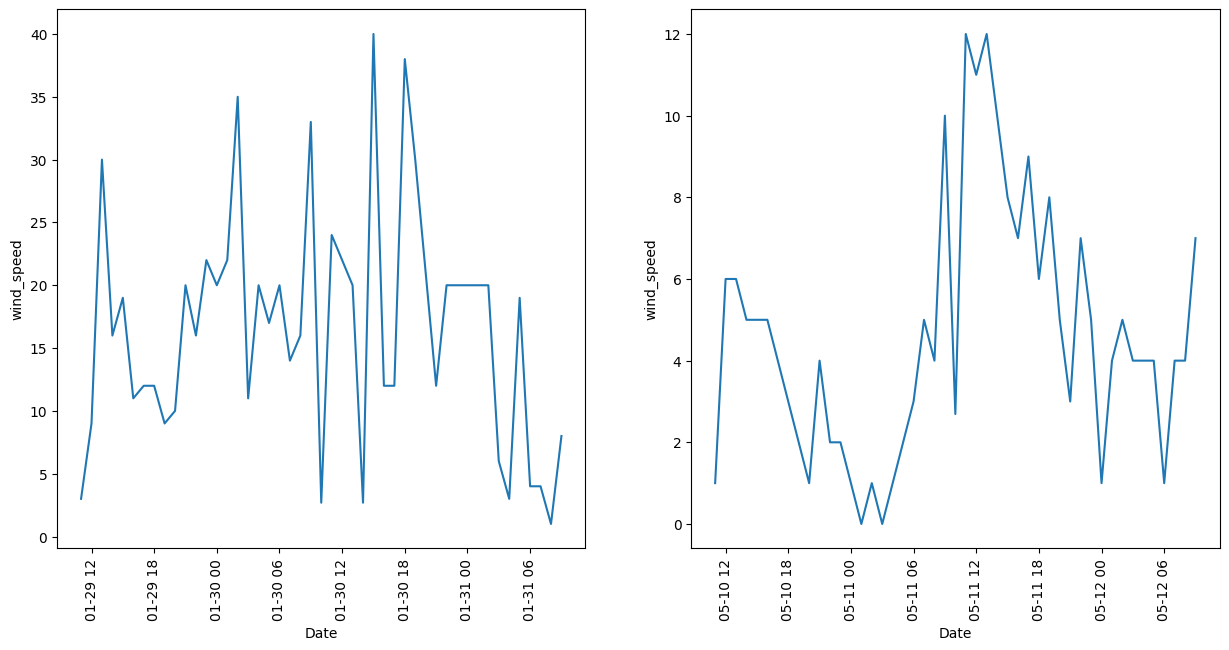

In [37]:
valencia_wind = mean_weather_by_city.loc['Valencia', 'wind_speed']
df_weather_wind_mean = df_weather.fillna(valencia_wind)

city = 'Valencia'
var = 'wind_speed'
date1 = '2015-01-29 10:00:00+00:00'
date2 = '2015-01-31 10:00:00+00:00'
date3 = '2017-05-10 10:00:00+00:00'
date4 = '2017-05-12 10:00:00+00:00'

visualize_outlier(df_weather_wind_mean, city, var, date1, date2, date3, date4)


We try to fill the NaN value with the interpolation method

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_2069/1578090396.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_weather4.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)


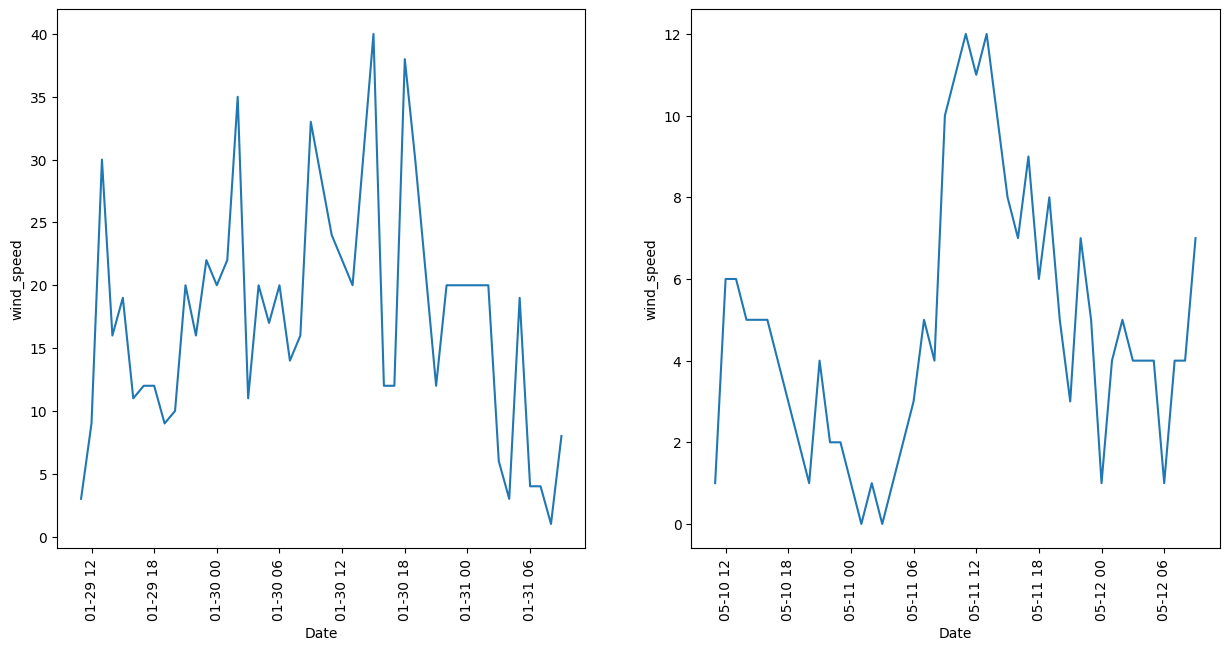

In [38]:
df_weather4 = df_weather.copy()
df_weather4.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

city = 'Valencia'
var = 'wind_speed'
date1 = '2015-01-29 10:00:00+00:00'
date2 = '2015-01-31 10:00:00+00:00'
date3 = '2017-05-10 10:00:00+00:00'
date4 = '2017-05-12 10:00:00+00:00'

visualize_outlier(df_weather4, city, var, date1, date2, date3, date4)

### Check the '3h_rain' columns

In [39]:
def plot_total(cities):
    fig, axs = plt.subplots(2, len(cities), figsize=(5 * len(cities), 10), sharex=True)
    for i, city in enumerate(cities):
        city_data = df_weather[df_weather['city_name'] == city]
        axs[0, i].plot(city_data['time'], city_data['rain_1h'])
        axs[0, i].set_title(f'Rainfall for 1h in {city}')
        axs[0, i].set_xlabel('Date')
        axs[0, i].set_ylabel('mm')
        axs[0, i].tick_params(axis='x', rotation=45)
    for i, city in enumerate(cities):
        city_data = df_weather[df_weather['city_name'] == city]
        axs[1, i].plot(city_data['time'], city_data['rain_3h'])
        axs[1, i].set_title(f'Rainfall for 3h in {city}')
        axs[1, i].set_xlabel('Date')
        axs[1, i].set_ylabel('mm')
        axs[1, i].tick_params(axis='x', rotation=45)
    plt.show()  

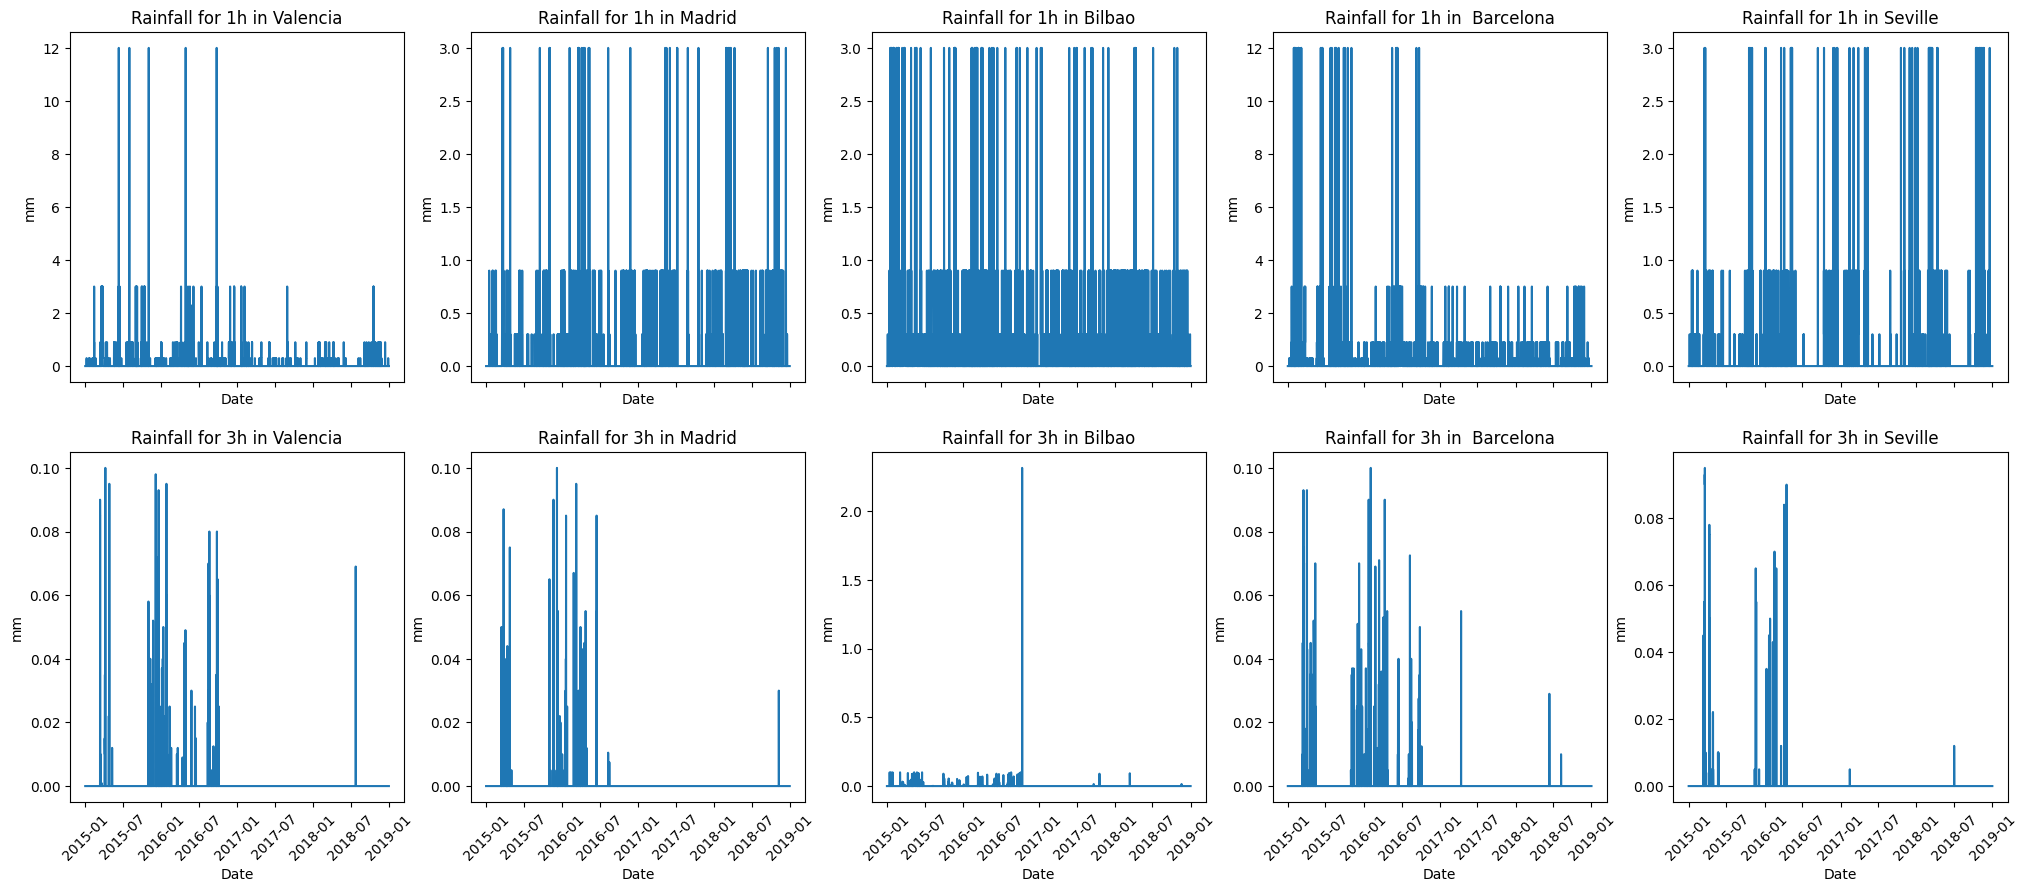

In [40]:
city_unique = df_weather['city_name'].unique()
plot_total(city_unique)

In [41]:
df_weather

,city_name,time,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,Valencia,2014-12-31 23:00:00+00:00,-2.675,-2.675,-2.675,1001.0,77,1.0,62,0.0,0.0,0.0,0
1,Valencia,2015-01-01 00:00:00+00:00,-2.675,-2.675,-2.675,1001.0,77,1.0,62,0.0,0.0,0.0,0
2,Valencia,2015-01-01 01:00:00+00:00,-3.464,-3.464,-3.464,1002.0,78,0.0,23,0.0,0.0,0.0,0
3,Valencia,2015-01-01 02:00:00+00:00,-3.464,-3.464,-3.464,1002.0,78,0.0,23,0.0,0.0,0.0,0
4,Valencia,2015-01-01 03:00:00+00:00,-3.464,-3.464,-3.464,1002.0,78,0.0,23,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,Seville,2018-12-31 18:00:00+00:00,14.610,14.000,15.000,1028.0,54,3.0,30,0.0,0.0,0.0,0
178392,Seville,2018-12-31 19:00:00+00:00,12.610,12.000,13.000,1029.0,62,3.0,30,0.0,0.0,0.0,0
178393,Seville,2018-12-31 20:00:00+00:00,12.000,12.000,12.000,1028.0,58,4.0,50,0.0,0.0,0.0,0
178394,Seville,2018-12-31 21:00:00+00:00,11.000,11.000,11.000,1029.0,57,4.0,60,0.0,0.0,0.0,0


In [42]:
# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in df_weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [43]:
# Merge all dataframes into the final dataframe

df_final = df_energy

for df in dfs:
    column_to_exclude = 'time'
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df_excluding_column = df.drop(columns=[column_to_exclude])
    df_with_suffix = df_excluding_column.add_suffix('_{}'.format(city_str))
    df_with_suffix[column_to_exclude] = df[column_to_exclude]
    df_final = df_final.merge(df_with_suffix, on = 'time')
    df_final = df_final.drop('city_name_{}'.format(city_str), axis=1)
    
df_final.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp_Celsius_Barcelona', 'temp_min_Celsius_Barcelona',
       'temp_max_Celsius_Barcelon